<a href="https://colab.research.google.com/github/DaniSumaili/7048CEM/blob/main/Clustering_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans

from sklearn.metrics import matthews_corrcoef,cohen_kappa_score, mean_absolute_error,mean_squared_error 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
breastdata = pd.read_csv('/content/drive/My Drive/BreastCancer/Breast_GSE45827.csv')
breastdata.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,9.015007,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,9.371174,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,8.842430,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,10.554449,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,

In [ ]:
bc = breastdata.copy()

In [ ]:
#bc.head()

In [ ]:
data = bc.iloc[:,2:].values
data 

array([[ 9.85003997,  8.09792735,  6.42472816, ...,  2.9666567 ,
         3.50849465,  3.30199869],
       [ 9.86135737,  8.21222225,  7.06259284, ...,  2.9347635 ,
         3.68766637,  3.06429903],
       [10.1034785 ,  8.93613685,  5.73596977, ...,  2.84768393,
         3.55059675,  3.15853522],
       ...,
       [11.02709803,  7.18087582,  6.30473602, ...,  3.0851274 ,
         3.62884807,  3.21580734],
       [10.44439499,  7.5251525 ,  5.9644598 , ...,  3.01852519,
         3.77059745,  3.10229782],
       [11.34581728,  7.3792993 ,  5.89117177, ...,  3.06158533,
         3.85752548,  3.12982746]])

In [ ]:
#change the type(target class) column into category 
#bc["type"] = bc["type"].astype('category')
#bc.dtypes

In [ ]:
#bc["type_cat"] = bc["type"].cat.codes

In [ ]:
#bc.head()

In [ ]:
y = bc['type']
y

0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object

## **K-means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [ ]:
kmeans = KMeans(n_clusters=6, algorithm = 'full')
pred_y_kms = kmeans.fit_predict(scaled_data)
pred_y_kms

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 3, 3,
       3, 3, 5, 3, 3, 3, 3, 3, 0, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
kmeans

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_.shape

(6, 54675)

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.08142151 -1.72800831 -0.90012456 ... -0.06695318 -0.33859952
   0.16319211]
 [-0.70990649  1.67091538 -1.45898252 ...  1.40508854  1.51294087
   0.90172788]
 [-0.63874728  0.34167314  0.50815479 ... -0.32829693 -0.47280672
  -0.04566209]
 [ 0.52616107 -0.62331736  0.20010204 ...  0.07637727  0.02100434
   0.14815406]
 [ 0.07752898  0.33020392  0.03069503 ... -0.28249318  0.13719187
  -0.40962264]
 [ 0.32596917 -0.48531699 -0.05114068 ... -0.10197993 -0.78407075
  -0.30477219]]


In [ ]:
## creating a new dataframe only for pred_y_kms and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['label']))

df_labels['label'] = df_labels['label'].astype('category')

In [ ]:
## Joining the label dataframe with the original data frame. 
df_labeled = bc.join(df_labels)
df_labeled.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999,2
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299,2
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535,2
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,12.111235,11.719215,13.743108,13.508861,6.610284,5.19

In [ ]:
df_labeled['label'].value_counts()

3    47
4    38
2    33
1    14
5    12
0     7
Name: label, dtype: int64

**Evaluate k-means Clustering**

In [ ]:
print('Distortion: %.2f' % kmeans.inertia_)

Distortion: 6138066.27


Calculation of accuracy score. Since the k-means algorithm doesn´t have any knowledge on the true cluster labels, the permutations need to be found before comparing to the true labels.

In [ ]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [ ]:
permutation = find_permutation(6, y, kmeans.labels_)
print(permutation)

['normal', 'cell_line', 'basal', 'luminal_B', 'basal', 'luminal_A']


In [ ]:
#label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 
  
#cm_kms = confusion_matrix(y, pred_y_kms)
#disp_kms = ConfusionMatrixDisplay(confusion_matrix=cm_kms,display_labels= label)

#disp_kms.plot(xticks_rotation='vertical')

In [ ]:
new_labels_KMeans = [ permutation[label] for label in kmeans.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels_KMeans))

Accuracy score is 0.6026490066225165


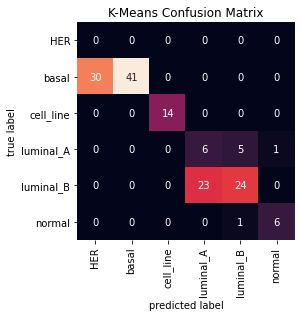

In [ ]:
## plot confusion matrix
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal']
mat = confusion_matrix(y, new_labels_KMeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label
            )
plt.title("K-Means Confusion Matrix")
plt.xlabel('predicted label')
plt.ylabel('true label');
#plt.savefig('confustion_matrix_1')

In [ ]:
print("\033[1m"  +'      ' +  ' K-Means  Model 1'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, new_labels_KMeans, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, new_labels_KMeans,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , new_labels_KMeans)))
#print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , new_labels_KMeans,)))# multioutput= 'uniform_average'
#print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , new_labels_KMeans, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, new_labels_KMeans)))
print("Accuracy =% 0.2f " % (accuracy_score(y, new_labels_KMeans)))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, new_labels_KMeans, target_names=label ))

       K-Means  Model 1
                                                          
Correctly Classified Instances = 91.
Percentage of Correctly Classified Instances = 0.60.
Kappa statistic= 0.49.
Matthews Corrcoef = 0.53.
Accuracy = 0.60 
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.00      0.00      0.00        30
       basal       0.58      1.00      0.73        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.50      0.21      0.29        29
   luminal_B       0.51      0.80      0.62        30
      normal       0.86      0.86      0.86         7

    accuracy                           0.60       151
   macro avg       0.57      0.64      0.58       151
weighted avg       0.49      0.60      0.51       151



# **Hierarchical clustering**

In [ ]:
# for hierarchical clusterization
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Preprocessing**

In [ ]:
col = breastdata.columns[2:]
col

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=col)
data_scaled.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.006955,0.005717,0.004536,0.005192,0.002139,0.004858,0.003505,0.003112,0.006263,0.002315,0.005166,0.004901,0.003356,0.006841,0.006728,0.003118,0.002867,0.004567,0.006122,0.002659,0.002620,0.003584,0.003136,0.004760,0.003973,0.003895,0.005724,0.003499,0.004089,0.002520,0.004016,0.002932,0.003464,0.005794,0.003152,0.003662,0.004195,0.002959,0.005234,0.002317,...,0.006365,0.008508,0.010415,0.009432,0.003938,0.002546,0.003164,0.003890,0.007445,0.007908,0.004188,0.003003,0.003567,0.005495,0.004982,0.005499,0.003378,0.002784,0.002756,0.004320,0.003150,0.003356,0.004774,0.003741,0.004271,0.005855,0.005807,0.005884,0.006958,0.006936,0.008635,0.008369,0.009644,0.009516,0.004424,0.003542,0.003461,0.002095,0.002477,0.002331
1,0.006941,0.005780,0.004971,0.005409,0.002217,0.005308,0.003610,0.003227,0.005467,0.002526,0.006171,0.005326,0.003420,0.005954,0.006316,0.003170,0.003794,0.004755,0.005705,0.003274,0.002770,0.003680,0.003135,0.004552,0.004081,0.003734,0.005283,0.003263,0.004151,0.002639,0.003929,0.003131,0.004132,0.005097,0.002772,0.003082,0.004430,0.002856,0.004786,0.002114,...,0.006596,0.005817,0.006995,0.006692,0.004296,0.002803,0.003338,0.003818,0.006251,0.007847,0.004456,0.003347,0.003853,0.006012,0.005361,0.005798,0.003667,0.002772,0.003205,0.004235,0.003818,0.003489,0.005212,0.003952,0.004658,0.005789,0.005919,0.005982,0.007082,0.006895,0.008571,0.008312,0.009677,0.009480,0.004766,0.003724,0.003805,0.002066,0.002595,0.002157
2,0.007136,0.006312,0.004052,0.005430,0.002208,0.004635,0.003400,0.003126,0.006652,0.002509,0.005612,0.005113,0.003442,0.006617,0.006451,0.003079,0.003140,0.003869,0.006182,0.002505,0.003012,0.003891,0.003266,0.005017,0.004691,0.003631,0.004996,0.003340,0.004403,0.002661,0.004244,0.002961,0.004038,0.005516,0.002902,0.003540,0.005127,0.003059,0.004875,0.002848,...,0.006246,0.007234,0.009610,0.008324,0.004134,0.002648,0.003113,0.004181,0.006843,0.008194,0.004266,0.003048,0.003726,0.005672,0.005003,0.005589,0.003338,0.002851,0.002925,0.004115,0.003555,0.003365,0.004963,0.003848,0.004511,0.005805,0.005799,0.005849,0.006851,0.006676,0.008564,0.008282,0.009621,0.009391,0.004483,0.003653,0.003662,0.002011,0.002508,0.002231
3,0.006892,0.005197,0.004577,0.004935,0.002247,0.005512,0.003879,0.003227,0.006373,0.002340,0.005478,0.005000,0.003438,0.005503,0.005090,0.003306,0.002947,0.004228,0.005090,0.002521,0.002338,0.003650,0.002939,0.004754,0.004079,0.004304,0.005061,0.003464,0.004045,0.002495,0.003993,0.002824,0.004345,0.005078,0.003058,0.003627,0.004450,0.002962,0.005003,0.002295,...,0.007456,0.006493,0.008580,0.007783,0.004219,0.002585,0.003290,0.003891,0.006543,0.008010,0.004376,0.003038,0.003583,0.005756,0.005332,0.005623,0.003692,0.002516,0.003042,0.004224,0.003545,0.003442,0.004992,0.003937,0.004689,0.005781,0.005868,0.005816

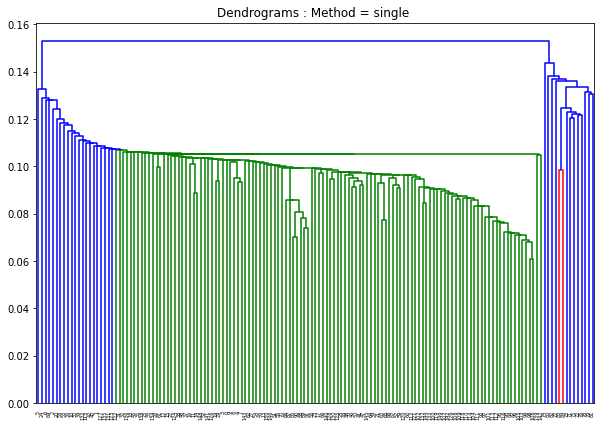

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms : Method = single ")
dend = shc.dendrogram(shc.linkage(data_scaled, method ='single'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 6, affinity= 'euclidean', linkage= 'single')
pred_y_HC = cluster.fit_predict(data_scaled)
pred_y_HC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 5, 0, 0, 2, 0, 0, 3, 0, 4, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=6)

In [ ]:
#label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 
  
#cm_hc = confusion_matrix(y, pred_y_HC)
#disp_hc = ConfusionMatrixDisplay(confusion_matrix=cm_hc,display_labels= label)

#disp_hc.plot(xticks_rotation='vertical')

In [ ]:
#print(classification_report(y,pred_y_HC,target_names=label ))
#print("fraction of Correctly classified samples = {}.".format(accuracy_score(y, pred_y_HC,)))
#print("Number of Correctly classified samples = {}.".format(accuracy_score(y, pred_y_HC, normalize=False)))


In [ ]:
## creating a new dataframe only for pred_y_kms and converting it into categorical variable
df_labels_hc = pd.DataFrame(cluster.labels_ , columns = list(['label']))

df_labels_hc['label'] = df_labels_hc['label'].astype('category')

In [ ]:
# Joining the label dataframe with the original data frame. 
df_labels_hc = bc.join(df_labels_hc)
df_labels_hc.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999,1
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299,1
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535,1
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,12.111235,11.719215,13.743108,13.508861,6.610284,5.19

In [ ]:
permutation_hc = find_permutation(6, y, cluster.labels_)
print(permutation_hc)

['cell_line', 'basal', 'cell_line', 'cell_line', 'cell_line', 'cell_line']


In [ ]:
new_labels_HC = [ permutation_hc[label] for label in cluster.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels_HC))

Accuracy score is 0.36423841059602646


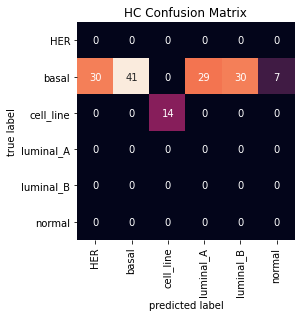

In [ ]:
## plot confusion matrix
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal']
mat_hc = confusion_matrix(y, new_labels_HC)
sns.heatmap(mat_hc.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label)
plt.title("HC Confusion Matrix")
plt.xlabel('predicted label')
plt.ylabel('true label');
#plt.savefig('confustion_matrix_2')

In [ ]:
print("\033[1m"  +'      ' +  ' HC SingleModel 1'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, new_labels_HC, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, new_labels_HC,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , new_labels_HC)))
#print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , new_labels_HC, multioutput= 'uniform_average')))
#print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , new_labels_HC, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, new_labels_HC)))
print("Accuracy =% 0.2f "% (accuracy_score(y, new_labels_HC)))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, new_labels_HC, target_names=label ))

       HC Single Model 1
                                                          
Correctly Classified Instances = 55.
Percentage of Correctly Classified Instances = 0.36.
Kappa statistic= 0.15.
Matthews Corrcoef = 0.30.
Accuracy = 0.36 
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.00      0.00      0.00        30
       basal       0.30      1.00      0.46        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.00      0.00      0.00        29
   luminal_B       0.00      0.00      0.00        30
      normal       0.00      0.00      0.00         7

    accuracy                           0.36       151
   macro avg       0.22      0.33      0.24       151
weighted avg       0.17      0.36      0.22       151



# **For presentation and report**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, matthews_corrcoef, precision_score, recall_score, roc_curve

In [ ]:
names = ["KMeans",  "HC"]
pred = [new_labels_KMeans, new_labels_HC]

model_cols = []
df = pd.DataFrame(columns = model_cols)
index = 0

for name, pred in zip(names, pred):
  df.loc[index,'Clusters'] = name
  df.loc[index,'Accuracy'] = accuracy_score(y, pred)
  df.loc[index, 'Precision'] = precision_score(y, pred, average='micro')
  df.loc[index,'Recall'] = recall_score(y, pred, average='micro')
  df.loc[index,'F1 Score'] = f1_score(y, pred, average='micro')
  df.loc[index,'MCC'] = matthews_corrcoef(y, pred)
  df.loc[index, 'Kappa'] = cohen_kappa_score(y , pred)
  

  index += 1

In [ ]:
print("\033[1m"  +'             ' +  ' Clustering Metric Evaluation scores'  + "\033[0m"    )
df

              Clustering Metric Evaluation scores


,Clusters,Accuracy,Precision,Recall,F1 Score,MCC,Kappa
0,KMeans,0.602649,0.602649,0.602649,0.602649,0.530877,0.493487
1,HC,0.364238,0.364238,0.364238,0.364238,0.297967,0.146692


                 Clustering Metric Evaluation graph


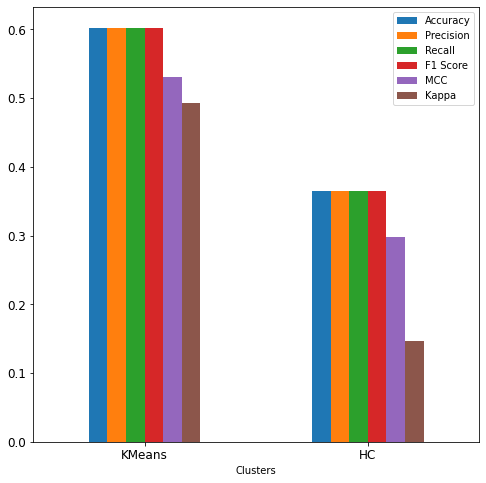

In [ ]:
df2 =df.copy()
print("\033[1m"  +'                ' +  ' Clustering Metric Evaluation graph'  + "\033[0m"    )
ax = df2.set_index('Clusters').plot.bar(rot=0,  figsize=(8,8), fontsize = 12)#title = 'Clustering',